In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [3]:
df = pd.read_csv("../Cpp/Output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,1.0,-100,3.720080e-44,0.984205,-0.456709,19.30810,7.904940e-44,8.031800e-44,2.336100e-44,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932
1,Uniform,1.0,-100,3.720080e-44,0.672467,-0.381224,2.15386,5.401120e-44,8.031800e-44,2.158810e-44,...,0.026400,0.024200,0.022300,0.020700,0.019300,0.018100,0.017100,0.016100,0.015200,0.000300
2,Gaussian,1.0,-50,1.928750e-22,0.984205,-0.456709,19.30810,4.098480e-22,4.164250e-22,1.211200e-22,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932
3,Uniform,1.0,-50,1.928750e-22,0.672467,-0.381224,2.15386,2.800320e-22,4.164250e-22,1.119280e-22,...,0.026400,0.024200,0.022300,0.020700,0.019300,0.018100,0.017100,0.016100,0.015200,0.000300
4,Gaussian,1.0,-20,2.061150e-09,0.984205,-0.456709,19.30810,4.379830e-09,4.450120e-09,1.294340e-09,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932


In [4]:
sorted(df['Noise'].unique())

[1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

In [11]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

# Deviation vs X

In [27]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[-10, 10], ylim=[1e-9, 1e+5], bbox=(1.15, 1.0)):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if xlim:
        ax.set_xlim(xlim)
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) ]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=bbox)

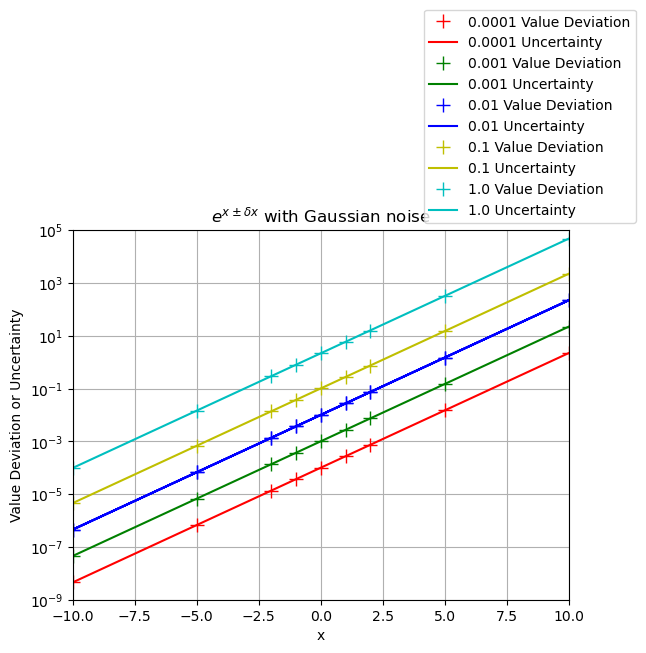

In [28]:
PlotValues()

In [29]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor=['r','g','b','y','c','m'], xlim=(-10, 10), ylim=(1e-9, 1e5) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.4, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.25))

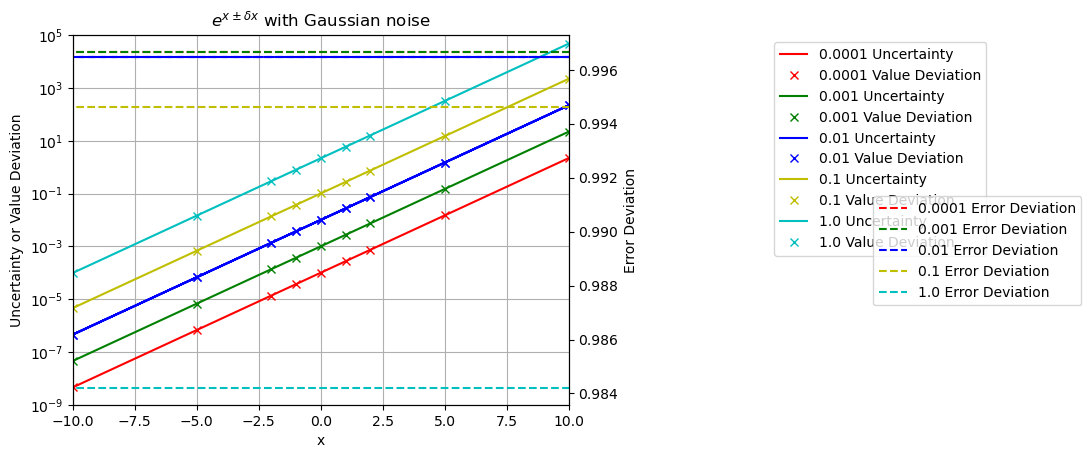

In [30]:
PlotErrorDev()

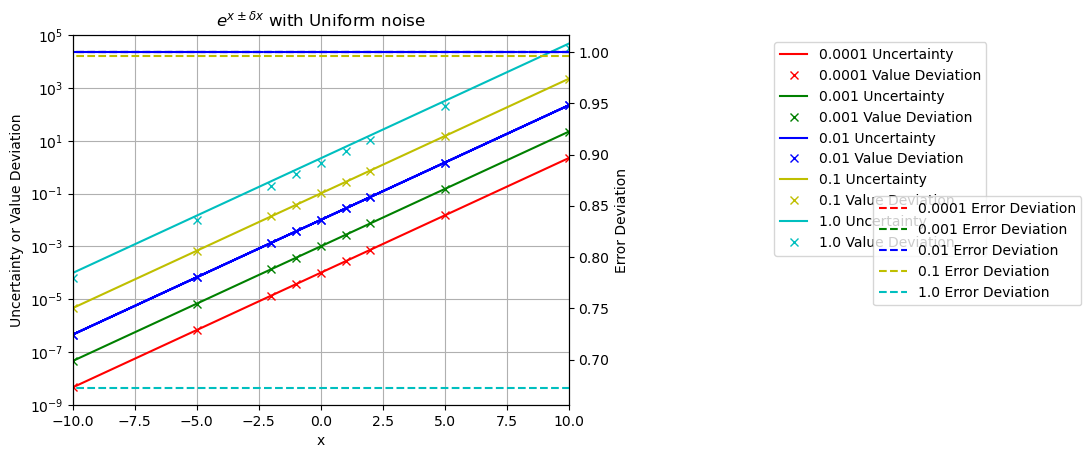

In [31]:
PlotErrorDev('Uniform')

# Mean vs Bias

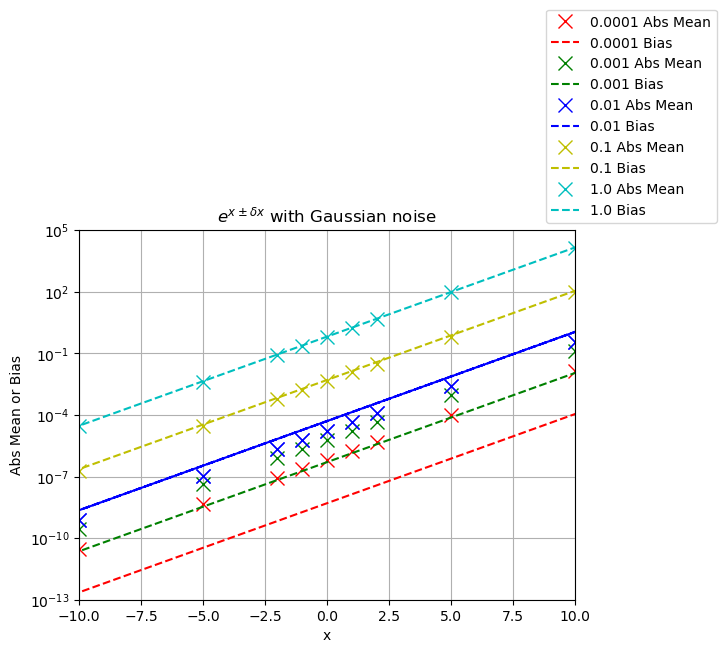

In [32]:
df['Abs Mean'] = abs(df['Mean'])
PlotValues(sValue=['Abs Mean', 'Bias'], sStyle=['x', '--'], ylim=[1e-13, 1e+5], bbox=(1.3, 1.0))

# Error Maximum and Minimum

# Histogram

In [33]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026400,0.024200,0.022300,0.020700,0.019300,0.018100,0.017100,0.016100,0.015200,0.000300
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026400,0.024200,0.022300,0.020700,0.019300,0.018100,0.017100,0.016100,0.015200,0.000300
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015862,0.013116,0.010066,0.008846,0.005999,0.006202,0.003762,0.003559,0.003864,0.001932


In [34]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


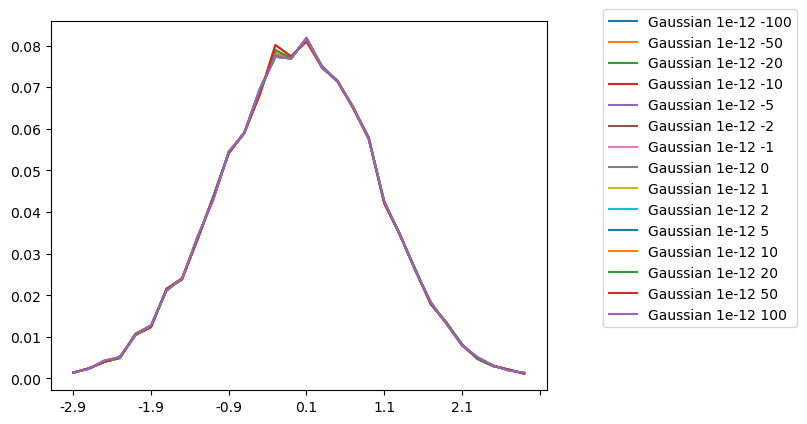

In [35]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])

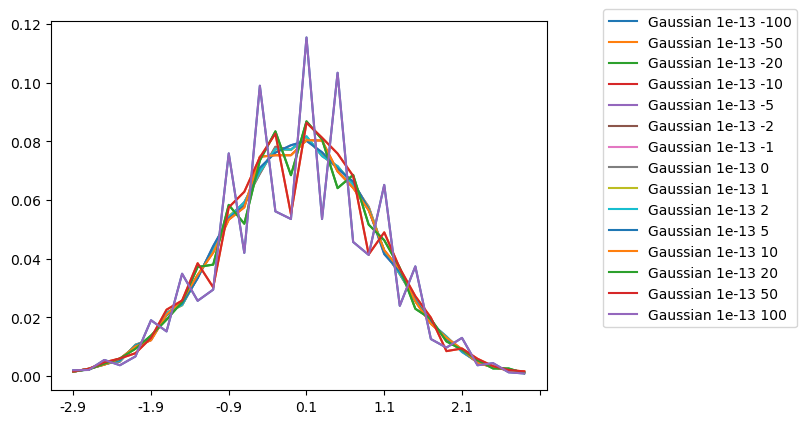

In [36]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-13])

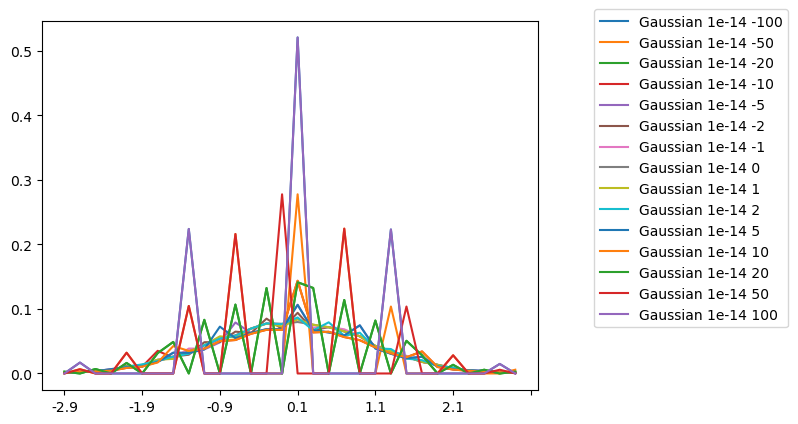

In [37]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-14])

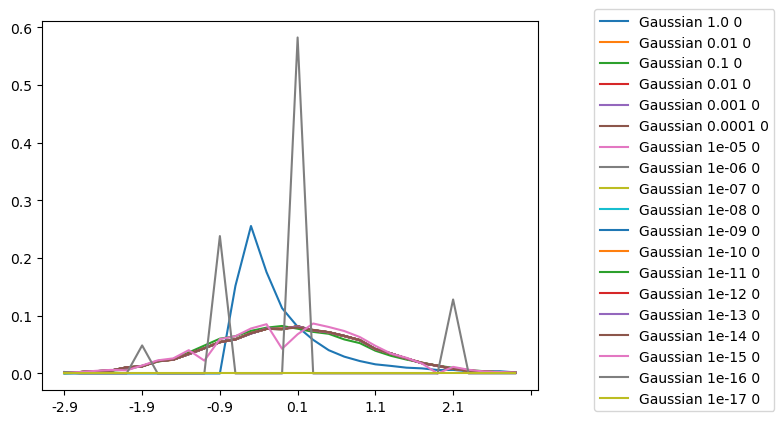

In [38]:
PlotHisto(sNoiseType=['Gaussian'], sX=[0])

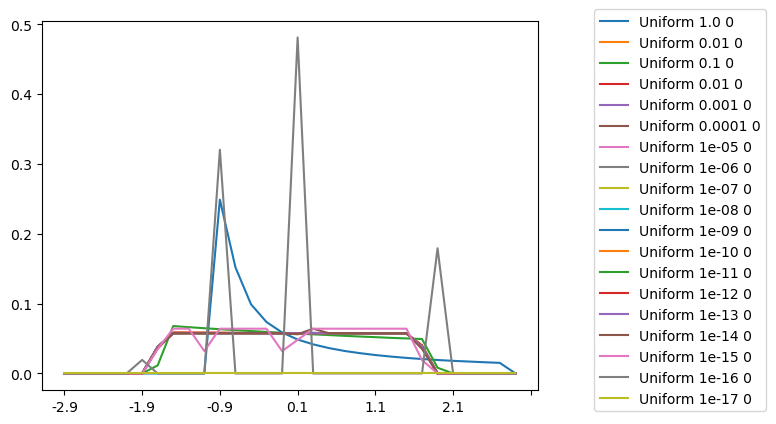

In [39]:
PlotHisto(sNoiseType=['Uniform'], sX=[0])

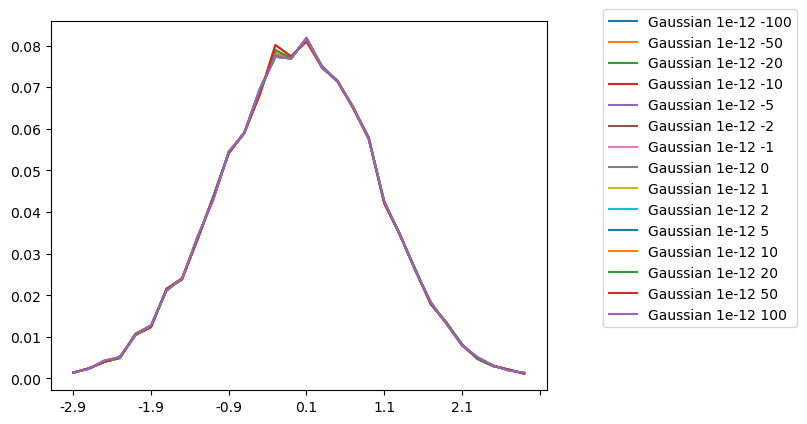

In [40]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])